<a href="https://colab.research.google.com/github/dhan-t/CCDEPLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [236]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [237]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [238]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [239]:
# prompt: tokenize my dataset

vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Prepare the dataset for tokenization
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

# Fit the tokenizer on the sentences
tokenizer.fit_on_texts(sentences)

# Create sequences and pad them
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')

# You can now use 'padded_sequences' as your tokenized and padded data
# and 'labels' for the corresponding labels.
# The tokenizer object 'tokenizer' can be used to convert sequences back to text
# or to get the word index.

In [240]:
tokenizer = Tokenizer(num_words = 100, oov_token="")
tokenizer.fit_on_texts(sentences)

In [241]:
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'na': 2, 'the': 3, 'ko': 4, 'i': 5, 'ang': 6, 'sa': 7, 'yung': 8, 'and': 9, 'ng': 10, 'lang': 11, 'it': 12, 'is': 13, 'po': 14, 'naman': 15, 'at': 16, 'seller': 17, 'to': 18, 'you': 19, 'order': 20, 'for': 21, 'not': 22, 'pero': 23, 'maganda': 24, 'pa': 25, 'hindi': 26, 'but': 27, 'sya': 28, 'good': 29, 'item': 30, 'thank': 31, 'a': 32, 'dumating': 33, 'sana': 34, 'so': 35, 'ung': 36, 'product': 37, 'my': 38, 'color': 39, 'this': 40, 'size': 41, 'quality': 42, 'was': 43, 'delivery': 44, 'di': 45, 'ok': 46, 'din': 47, 'may': 48, 'of': 49, 'its': 50, 'ako': 51, 'in': 52, 'very': 53, 'nyo': 54, 'lng': 55, 'price': 56, 'mga': 57, 'ganda': 58, 'time': 59, 'that': 60, 'working': 61, 'kasi': 62, 'black': 63, 'me': 64, 'buy': 65, 'items': 66, 'siya': 67, 'sobrang': 68, 'will': 69, 'white': 70, 'well': 71, 'ordered': 72, 'with': 73, 'kulay': 74, 'kaso': 75, '2': 76, 'as': 77, 'nice': 78, 'fast': 79, 'manipis': 80, 'okay': 81, '1': 82, 'lazada': 83, 'kung': 84, 'nya': 85, 'on': 86, 'just

In [242]:
# Get the number for a given word
print(word_index['favorite'])

1568


## 2. Sequence the data

In [243]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[1, 81, 1, 1, 78], [45, 1, 1, 57, 41, 1, 48, 68, 1, 1], [1, 1, 12, 6, 58, 1, 1, 20, 2, 1, 45, 1, 1, 1, 58, 20, 1, 51, 16, 6, 1, 33], [58, 14, 98], [1, 1, 24, 1, 28], [6, 1, 1, 1, 1, 1, 1, 4, 98, 47, 7, 44, 1, 6, 1, 1, 31, 19, 14, 1], [24, 28, 1, 80, 1, 11], [], [], [80, 1, 16, 1, 1, 1, 10, 1, 45, 24, 6, 1, 45, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1], [1, 1], [1, 1, 42, 1, 1], [31, 19, 6, 58, 1, 1, 51, 10, 1, 34, 38, 1, 2, 1, 99, 1, 1], [29, 42, 16, 1, 15, 6, 1, 31, 19, 17], [58, 1, 11, 1, 1, 1, 4, 1, 26, 1, 23, 6, 58, 1, 1], [1, 1, 1], [6, 58, 1, 1, 25, 7, 1, 1, 25, 1, 6, 1, 88, 17, 16, 7, 1, 1, 1, 20, 1, 1], [46, 15, 8, 1, 1, 1, 2, 1, 1, 1, 11, 9, 80, 1, 28, 45, 1, 1, 7, 1, 1, 1, 1, 23, 46, 2, 28, 21, 3, 56, 1, 11, 15, 1, 1, 4, 11, 28, 10, 1, 1, 2], [5, 1, 3, 39, 5, 1, 12, 35, 95, 75, 68, 1, 10, 44, 1, 10, 1, 1, 33, 8, 20, 4, 1, 1], [1], [78, 1, 1], [24, 8, 42, 85, 1], [1, 1, 6, 57, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 27, 5, 1, 50, 1, 93, 5, 1, 16, 3, 1, 1, 1, 1, 3, 41, 1, 14, 1, 1, 11, 48, 1, 1,

In [244]:

sentences2 = ["I like hot chocolate", "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]

sequences2 = tokenizer.texts_to_sequences(sentences2)
print(sequences2)

[[5, 1, 1, 1], [38, 1, 9, 38, 1, 1, 1, 27, 38, 1, 1, 1, 9, 38, 1, 1, 1, 1, 1, 1]]


## 3. Pad the data

In [245]:
# Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [246]:
sentences = [
    'Paborito kong UI ay malinis at madaling gamitin',
    'gusto mo rin ba ng responsive design?',
    'Pumasa sa accessibility tests ang code ko!',
    "ang paborito mong frontend framework ay React",
    "Hindi maganda ang CSS para sa kumplikadong layouts nang mag-isa",
    "ang iyong component, ang iyong state, at ang iyong props ay mas gusto ang organisasyon"
]
print(sentences)

['Paborito kong UI ay malinis at madaling gamitin', 'gusto mo rin ba ng responsive design?', 'Pumasa sa accessibility tests ang code ko!', 'ang paborito mong frontend framework ay React', 'Hindi maganda ang CSS para sa kumplikadong layouts nang mag-isa', 'ang iyong component, ang iyong state, at ang iyong props ay mas gusto ang organisasyon']


In [247]:
tokenizer = Tokenizer(num_words = 100, oov_token="")


In [248]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'ang': 2, 'ay': 3, 'iyong': 4, 'paborito': 5, 'at': 6, 'gusto': 7, 'sa': 8, 'kong': 9, 'ui': 10, 'malinis': 11, 'madaling': 12, 'gamitin': 13, 'mo': 14, 'rin': 15, 'ba': 16, 'ng': 17, 'responsive': 18, 'design': 19, 'pumasa': 20, 'accessibility': 21, 'tests': 22, 'code': 23, 'ko': 24, 'mong': 25, 'frontend': 26, 'framework': 27, 'react': 28, 'hindi': 29, 'maganda': 30, 'css': 31, 'para': 32, 'kumplikadong': 33, 'layouts': 34, 'nang': 35, 'mag': 36, 'isa': 37, 'component': 38, 'state': 39, 'props': 40, 'mas': 41, 'organisasyon': 42}


In [249]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[5, 9, 10, 3, 11, 6, 12, 13], [7, 14, 15, 16, 17, 18, 19], [20, 8, 21, 22, 2, 23, 24], [2, 5, 25, 26, 27, 3, 28], [29, 30, 2, 31, 32, 8, 33, 34, 35, 36, 37], [2, 4, 38, 2, 4, 39, 6, 2, 4, 40, 3, 41, 7, 2, 42]]


In [250]:
padded = pad_sequences(sequences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)



Word Index =  {'': 1, 'ang': 2, 'ay': 3, 'iyong': 4, 'paborito': 5, 'at': 6, 'gusto': 7, 'sa': 8, 'kong': 9, 'ui': 10, 'malinis': 11, 'madaling': 12, 'gamitin': 13, 'mo': 14, 'rin': 15, 'ba': 16, 'ng': 17, 'responsive': 18, 'design': 19, 'pumasa': 20, 'accessibility': 21, 'tests': 22, 'code': 23, 'ko': 24, 'mong': 25, 'frontend': 26, 'framework': 27, 'react': 28, 'hindi': 29, 'maganda': 30, 'css': 31, 'para': 32, 'kumplikadong': 33, 'layouts': 34, 'nang': 35, 'mag': 36, 'isa': 37, 'component': 38, 'state': 39, 'props': 40, 'mas': 41, 'organisasyon': 42}

Sequences =  [[5, 9, 10, 3, 11, 6, 12, 13], [7, 14, 15, 16, 17, 18, 19], [20, 8, 21, 22, 2, 23, 24], [2, 5, 25, 26, 27, 3, 28], [29, 30, 2, 31, 32, 8, 33, 34, 35, 36, 37], [2, 4, 38, 2, 4, 39, 6, 2, 4, 40, 3, 41, 7, 2, 42]]

Padded Sequences:
[[ 0  0  0  0  0  0  0  5  9 10  3 11  6 12 13]
 [ 0  0  0  0  0  0  0  0  7 14 15 16 17 18 19]
 [ 0  0  0  0  0  0  0  0 20  8 21 22  2 23 24]
 [ 0  0  0  0  0  0  0  0  2  5 25 26 27  3 28]
 [ 

In [251]:

# Specify a max length for the padded sequences
padded = pad_sequences(sequences, maxlen=15)
print(padded)

[[ 0  0  0  0  0  0  0  5  9 10  3 11  6 12 13]
 [ 0  0  0  0  0  0  0  0  7 14 15 16 17 18 19]
 [ 0  0  0  0  0  0  0  0 20  8 21 22  2 23 24]
 [ 0  0  0  0  0  0  0  0  2  5 25 26 27  3 28]
 [ 0  0  0  0 29 30  2 31 32  8 33 34 35 36 37]
 [ 2  4 38  2  4 39  6  2  4 40  3 41  7  2 42]]


In [252]:

# Put the padding at the end of the sequences
padded = pad_sequences(sequences, maxlen=15, padding="post")
print(padded)

[[ 5  9 10  3 11  6 12 13  0  0  0  0  0  0  0]
 [ 7 14 15 16 17 18 19  0  0  0  0  0  0  0  0]
 [20  8 21 22  2 23 24  0  0  0  0  0  0  0  0]
 [ 2  5 25 26 27  3 28  0  0  0  0  0  0  0  0]
 [29 30  2 31 32  8 33 34 35 36 37  0  0  0  0]
 [ 2  4 38  2  4 39  6  2  4 40  3 41  7  2 42]]


In [253]:

# Limit the length of the sequences, you will see some sequences get truncated
padded = pad_sequences(sequences, maxlen=3)
print(padded)

[[ 6 12 13]
 [17 18 19]
 [ 2 23 24]
 [27  3 28]
 [35 36 37]
 [ 7  2 42]]


In [254]:
# Try turning sentences that contain words that
# aren't in the word index into sequences.
# Add your own sentences to the test_data
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print(" has the number", word_index[''], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word
# that's not in the word index
print(padded)

["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
 has the number 1 in the word index.

Test Sequence =  [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]

Padded Test Sequence: 
[[0 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1]]


## 4. Train a sentiment model

In [255]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import tensorflow as tf

# Scale the original ratings to a 0.0 to 1.0 range
# Assuming original ratings are 1 to 5
min_rating = min(labels)
max_rating = max(labels)
scaled_labels = [(label - min_rating) / (max_rating - min_rating) for label in labels]

# Split the data into training and testing sets
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    padded_sequences, scaled_labels, test_size=0.2, random_state=42
)

# Convert lists to numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

embedding_dim = 16
max_length = padded_sequences.shape[1] # Use the max length from padding

model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(50, activation='relu'),
    Dense(1, activation='linear') # Single output neuron with linear activation for regression
])

# Use Mean Squared Error (MSE) for regression
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

num_epochs = 30
history = model.fit(training_sentences, training_labels, epochs=num_epochs, validation_data=(testing_sentences, testing_labels), verbose=2)

# Function to predict sentiment score for new text (0-1 scale)
def predict_sentiment_score(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    predicted_score = model.predict(padded_sequence)[0][0]
    # Ensure the predicted score is within the 0-1 range (sometimes predictions can slightly exceed due to model behavior)
    predicted_score = max(0.0, min(1.0, predicted_score))
    return predicted_score

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_12         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 - 3s - 124ms/step - loss: 0.1976 - mse: 0.1976 - val_loss: 0.1578 - val_mse: 0.1578
Epoch 2/30
25/25 - 0s - 9ms/step - loss: 0.1392 - mse: 0.1392 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 3/30
25/25 - 0s - 9ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 4/30
25/25 - 0s - 11ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0973 - val_mse: 0.0973
Epoch 5/30
25/25 - 0s - 6ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 6/30
25/25 - 0s - 6ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 7/30
25/25 - 0s - 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 8/30
25/25 - 0s - 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 9/30
25/25 - 0s - 11ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 10/30
25/25 - 0s - 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0792 - val_mse: 0.0792
Epoch

## Get files for visualing the network

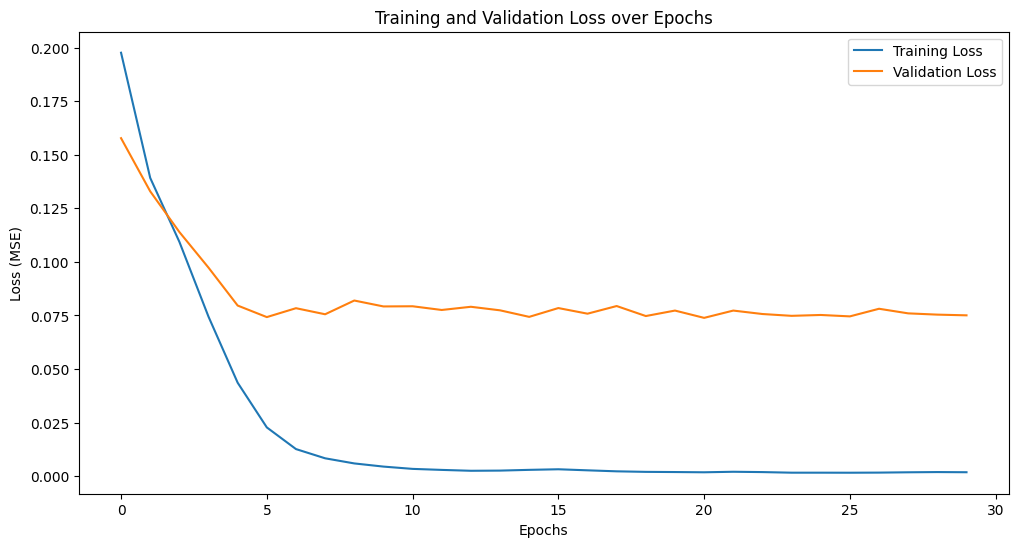

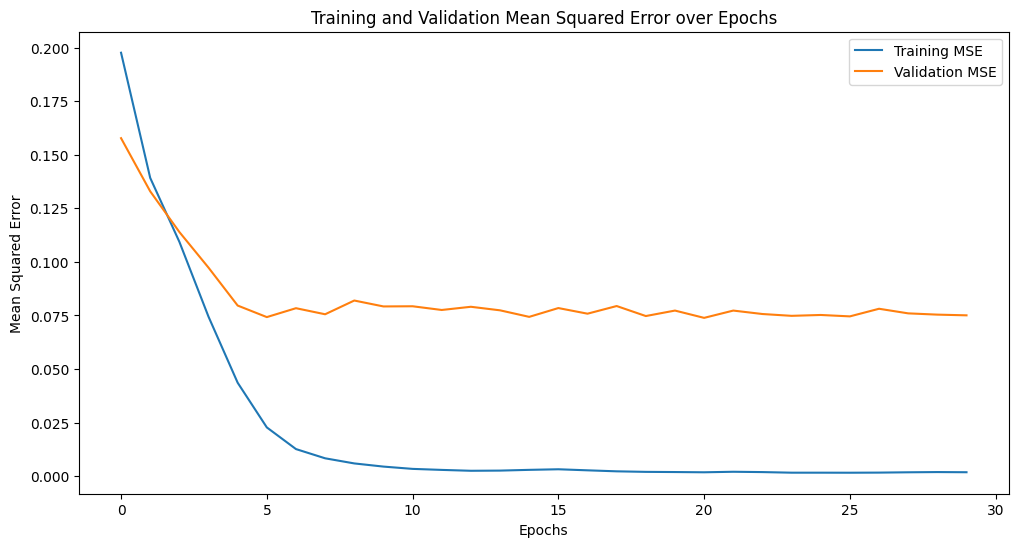

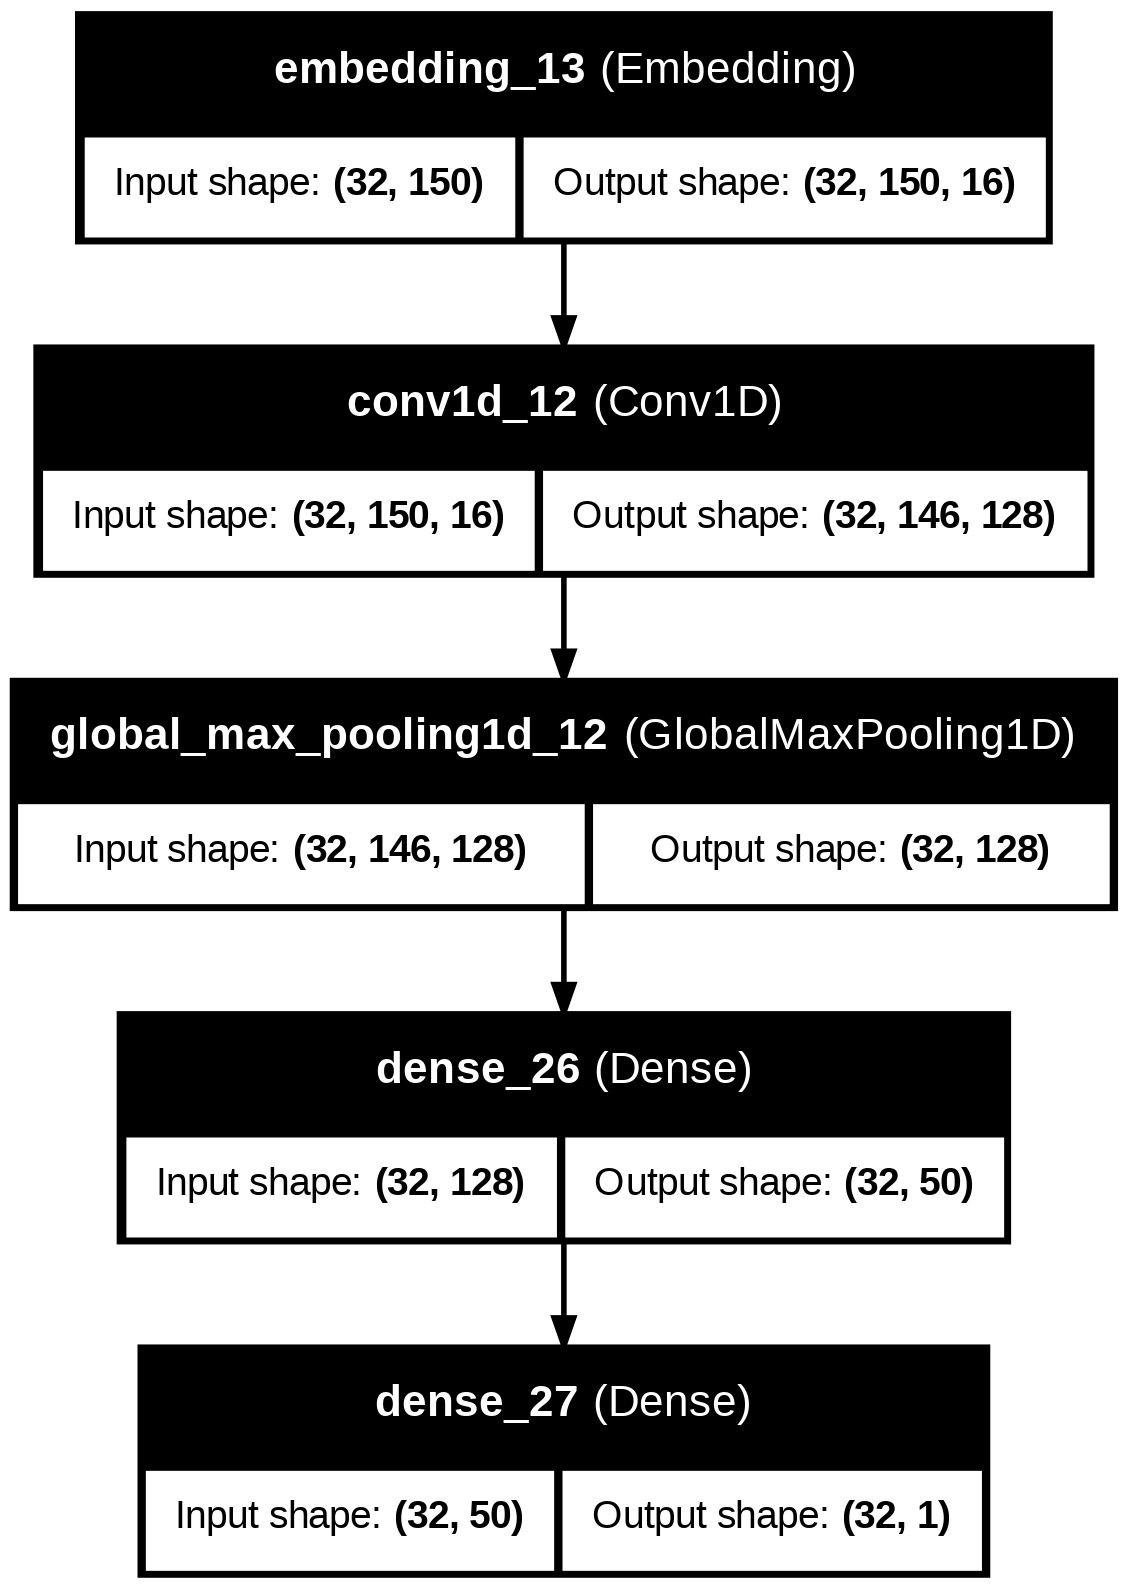

In [270]:
# prompt: visualize the network for me. use the necessary visuals to showcase the performance of it

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation Mean Squared Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# You can also visualize the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## 5. Predict sentiment with new reviews

In [271]:
def score_to_label(score):
    if score >= 0.67:
        return "Positive"
    elif score >= 0.46: # Adjusted threshold for Neutral
        return "Neutral"
    else:
        return "Negative"

# More random Tagalog sentences to test
more_tagalog_sentences_to_test = [
'sakto lang',
                                   'pangit ng produkto niyo, gawang instek',
                                    'ganda ng product niyo. sobrang natuwa ako gamitin yung binili ko mula sainyo'
]
for sentence in more_tagalog_sentences_to_test:
    sentiment_score = predict_sentiment_score(sentence)
    sentiment_label = score_to_label(sentiment_score)
    print(f"Sentence: '{sentence}' -> Sentiment Score (0-1): {sentiment_score:.2f} -> Label: {sentiment_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sentence: 'sakto lang' -> Sentiment Score (0-1): 0.48 -> Label: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sentence: 'pangit ng produkto niyo, gawang instek' -> Sentiment Score (0-1): 0.39 -> Label: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sentence: 'ganda ng product niyo. sobrang natuwa ako gamitin yung binili ko mula sainyo' -> Sentiment Score (0-1): 0.52 -> Label: Neutral
